In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Я себе нагенерировала три набора данных для дистанционных графов:
- 10000 значений характеристик для графов на 25 вершинах (по 5000 значений для каждого распределения).
- 10000 значений характеристик для графов на 100 вершинах(по 5000 значений для каждого распределения).
- 2000 значений характеристик для графов на 500 вершинах (по 1000 значений для каждого распределения). Размер меньше, чем у предыдущих двух наборов, т.к. для графов на 500 вершинах классификация довольно простая, и это видно еще из 1 части задачи по построению множества А.

Для дистанционных графов зафиксировала $dist = 1$, т.к. для больших значений решать задачу не очень интересно -- тогда граф становится все больше похож на полный, а при маленьких значениях многие характеристики для обоих распределений совпадают. Ну а судя по графикам из 1 части, именно такое значение $dist$ рассмотреть будет интересно, и в то же время не очень сложно.

Я использую следующие характеристики:
- хроматическое число графа
- число треугольников
- максимальная степень вершины

Размер максимального независимого множества не использую, т.к. он выражается через хроматическое число (при условии, что хроматическое число равно кликовому числу -- что верно в дистанционных графах): 
$$\alpha(G) = n - \chi(G),$$
где $n$ -- число вершин в графе. Соответственно, никакий новой информации эта характеристика не несет.

В качестве классификаторов я буду использовать логистическую регрессию, дерево решений и случайный лес -- исходя из анализа 1 части определение класса распределения не будет какой-то дико сложной задачей, поэтому зачем придумывать себе сложности, когда можно взять что-то простое и не париться.

### $n = 25$

In [47]:
df1 = pd.read_csv("data_25_samples.csv")

Построим матрицу корреляций признаков:

[]

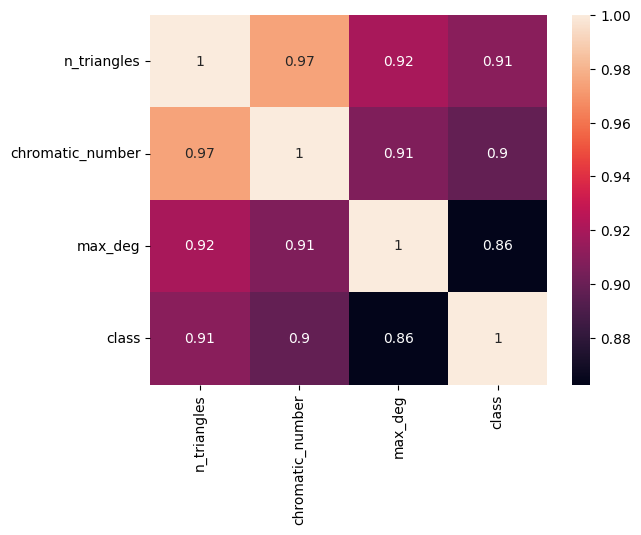

In [100]:
sns.heatmap(df1.corr(method="pearson"), annot=True)
plt.plot()

Видна неплохая корреляция между признаками, поэтому есть вероятность, что линейные модели будут хорошо работать.

In [48]:
X = df1.drop(["class"], axis=1)
y = df1["class"]

In [49]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, shuffle=True, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression(
    random_state=42,
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для логистической регрессии:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для логистической регрессии: 0.9836


Посмотрим на важности признаков:

In [51]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.coef_[0]
})

importance

,feature_name,importance
0,n_triangles,-0.001423
1,chromatic_number,1.472572
2,max_deg,1.935601


Посмотрим на матрицу ошибок:

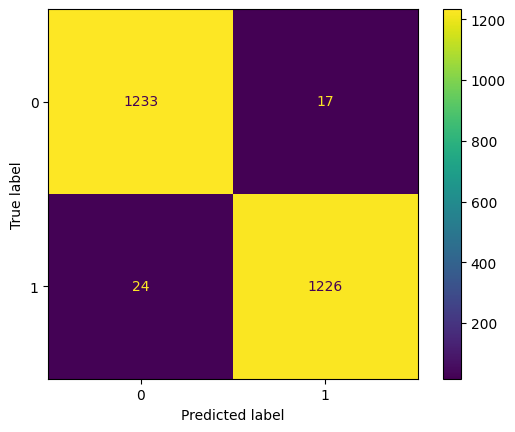

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 
$$\frac{17}{1250} = 0.0136$$

А мощность равна
$$\frac{1226}{1250} = 0.9808$$

In [58]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(
    random_state=42
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для дерева решений:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для дерева решений: 0.974


Посмотрим на важности признаков:

In [59]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.feature_importances_
})

importance

,feature_name,importance
0,n_triangles,0.952831
1,chromatic_number,0.013759
2,max_deg,0.033410


Посмотрим на матрицу ошибок:

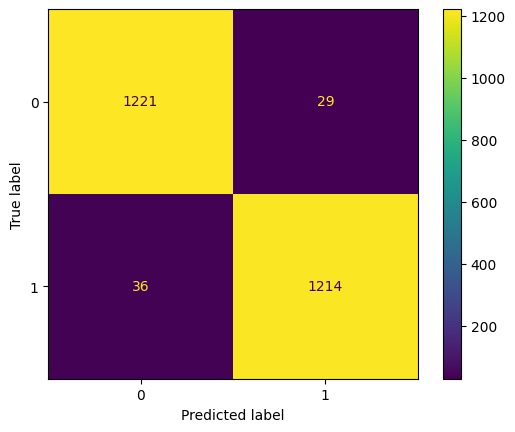

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 
$$\frac{29}{1250} = 0.0232$$

А мощность равна
$$\frac{1214}{1250} = 0.9712$$

In [62]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(
    random_state=42
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для случайного леса:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для случайного леса: 0.9788


Посмотрим на важности признаков:

In [20]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.feature_importances_
})

importance

,feature_name,importance
0,n_triangles,0.379909
1,chromatic_number,0.343405
2,max_deg,0.276686


Посмотрим на матрицу ошибок:

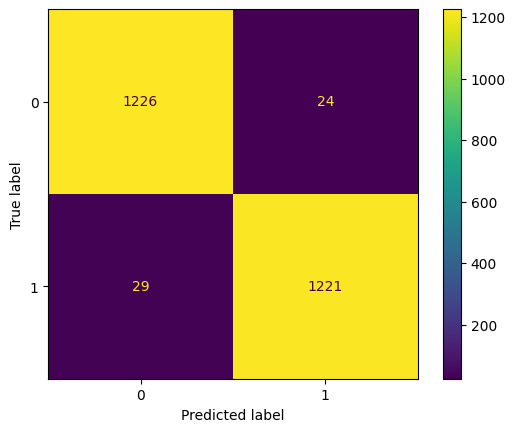

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 
$$\frac{24}{1250} = 0.0192$$

А мощность равна
$$\frac{1221}{1250} = 0.9768$$

In [106]:
print("Дисперсия метрик качества равна:", round(np.var([0.9836, 0.974, 0.9788]), 6))

Дисперсия метрик качества равна: 1.5e-05


Результаты: для графов на 25 вершинах лучше всего отработала логистическая регрессия. Возможно, это произошло, т.к. между характеристиками двух распределений граница не такая уж и заметная, поэтому эвристические алгоритмы (типа дерева решений или случайного леса) работали хуже. 

Если смотреть на ошибку первого рода, то она не превосходит $\alpha = 0.05$, т.е. все три классификатора подходят как статистические критерии.

При этом лучшим алгоритмом по мощности и по точности является логистическая регрессия.

### $n = 100$

In [71]:
df2 = pd.read_csv("data_100_samples.csv")

Построим матрицу корреляций признаков:

[]

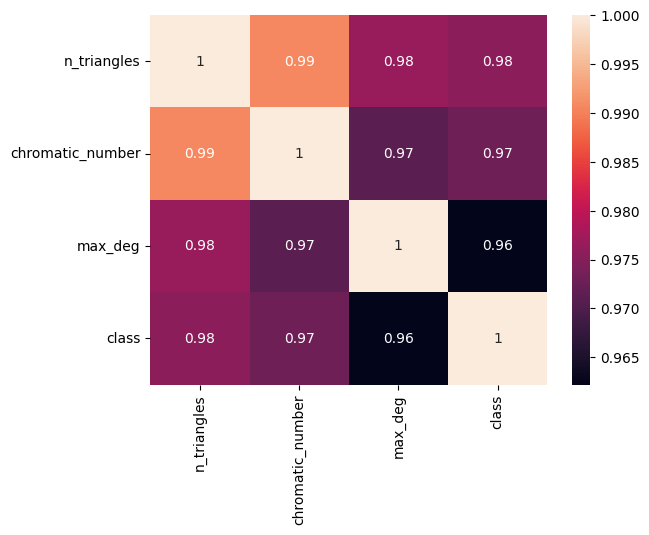

In [101]:
sns.heatmap(df2.corr(method="pearson"), annot=True)
plt.plot()

In [72]:
X = df2.drop(["class"], axis=1)
y = df2["class"]

In [73]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, shuffle=True, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression(
    random_state=42,
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для логистической регрессии:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для логистической регрессии: 0.9996


Посмотрим на важности признаков:

In [75]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.coef_[0]
})

importance

,feature_name,importance
0,n_triangles,0.001332
1,chromatic_number,-0.477475
2,max_deg,-0.855327


Посмотрим на матрицу ошибок:

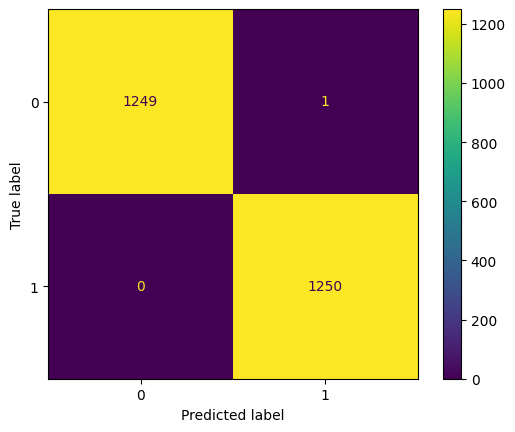

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 
$$\frac{1}{1250} = 0.0008$$

А мощность равна 1.

In [79]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(
    random_state=42
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для дерева решений:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для дерева решений: 1.0


Посмотрим на важности признаков:

In [80]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.feature_importances_
})

importance

,feature_name,importance
0,n_triangles,0.0
1,chromatic_number,0.0
2,max_deg,1.0


Посмотрим на матрицу ошибок:

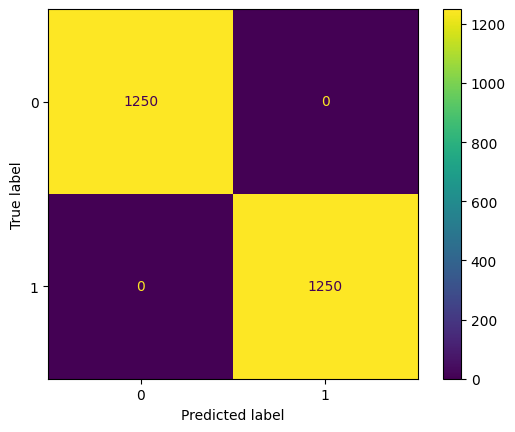

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 0.

А мощность равна 1.

In [82]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(
    random_state=42
)
clf.fit(X_train, y_train)

test_prefictions = clf.predict(X_test)
print("Точность на тестовой выборке для случайного леса:", accuracy_score(y_test, test_prefictions))

Точность на тестовой выборке для случайного леса: 1.0


Посмотрим на важности признаков:

In [83]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.feature_importances_
})

importance

,feature_name,importance
0,n_triangles,0.360047
1,chromatic_number,0.359896
2,max_deg,0.280057


Посмотрим на матрицу ошибок:

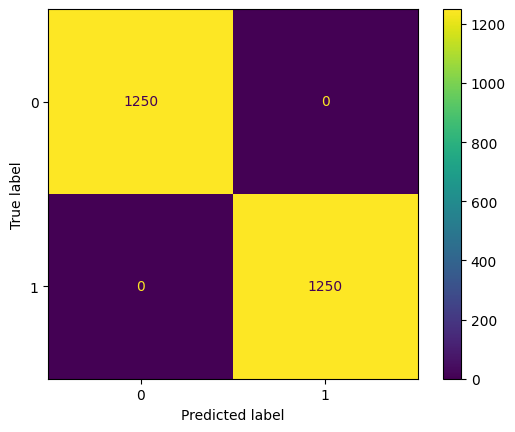

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 0.

А мощность равна 1.

In [108]:
print("Дисперсия метрик качества равна:", round(np.var([0.9996, 1, 1]), 9))

Дисперсия метрик качества равна: 3.6e-08


В этом случае результаты вообще прекрасные -- граница между характеристиками разных распределений стала более видимой, поэтому и точность стала выше.

И конечно, все три классификатора дают ошибку первого рода меньше, чем $\alpha = 0.05$.

### $n = 500$

In [85]:
df3 = pd.read_csv("data_500_samples.csv")

Построим матрицу корреляций признаков:

[]

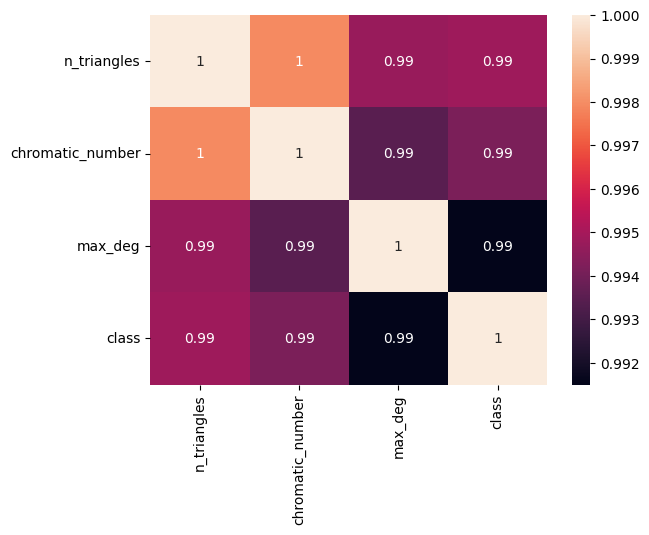

In [102]:
sns.heatmap(df3.corr(method="pearson"), annot=True)
plt.plot()

In [86]:
X = df3.drop(["class"], axis=1)
y = df3["class"]

In [87]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, shuffle=True, random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression(
    random_state=42,
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для логистической регрессии:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для логистической регрессии: 1.0


Посмотрим на важности признаков:

In [89]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.coef_[0]
})

importance

,feature_name,importance
0,n_triangles,0.000005
1,chromatic_number,-0.044835
2,max_deg,-0.085797


Посмотрим на матрицу ошибок:

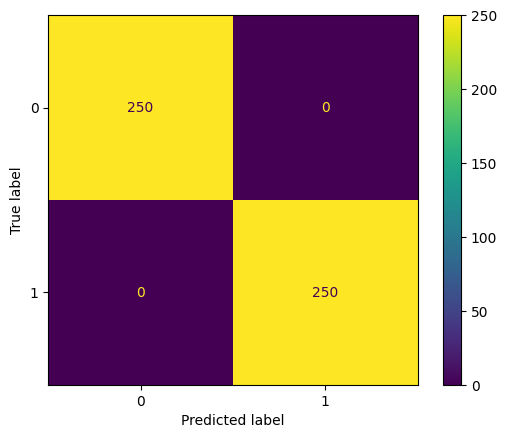

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 0.

А мощность равна 1.

In [91]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(
    random_state=42
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для дерева решений:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для дерева решений: 1.0


Посмотрим на важности признаков:

In [92]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.feature_importances_
})

importance

,feature_name,importance
0,n_triangles,0.0
1,chromatic_number,1.0
2,max_deg,0.0


Посмотрим на матрицу ошибок:

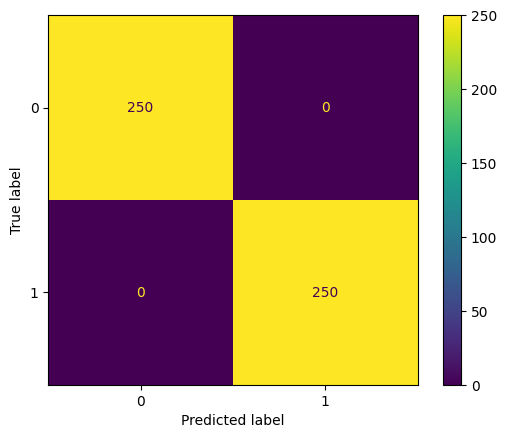

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 0.

А мощность равна 1.

In [94]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(
    random_state=42
)
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
print("Точность на тестовой выборке для случайного леса:", accuracy_score(y_test, test_predictions))

Точность на тестовой выборке для случайного леса: 1.0


Посмотрим на важности признаков:

In [95]:
importance = pd.DataFrame({
    "feature_name": clf.feature_names_in_,
    "importance": clf.feature_importances_
})

importance

,feature_name,importance
0,n_triangles,0.36
1,chromatic_number,0.36
2,max_deg,0.28


Посмотрим на матрицу ошибок:

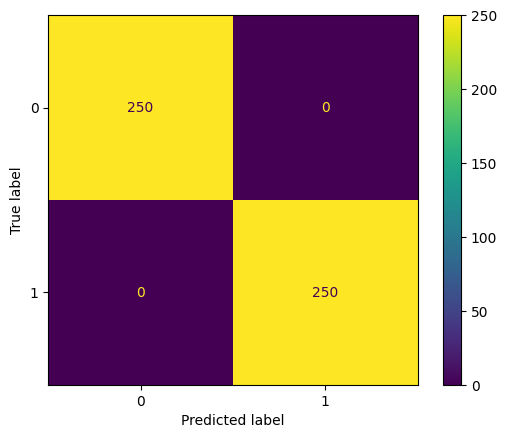

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show();

Тогда ошибка первого рода равна 0.

А мощность равна 1.

In [112]:
print("Дисперсия метрик качества равна:", round(np.var([1, 1, 1]), 9))

Дисперсия метрик качества равна: 0.0


Тут, как и предполагалось, высокая точность при использовании всех алгоритмов, т.к. разделение между распределениями довольно четкое, и это было видно еще в 1 части задания.

(Зеленым и красным показаны значения хроматического числа для двух распределений, синим обозначено множество значений $A$)

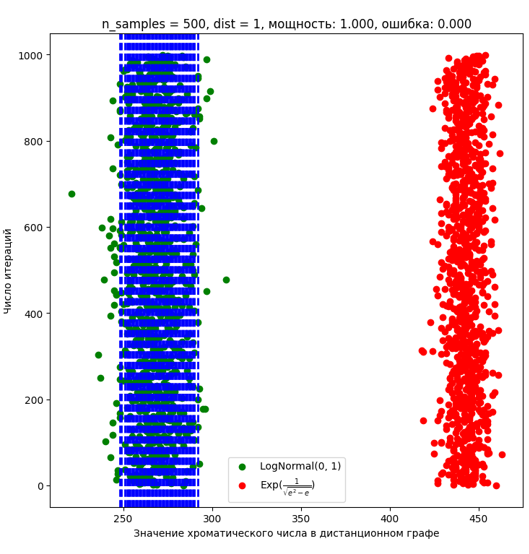

Если смотреть на важность признаков, то довольно понятен алгоритм работы дерева решений: в основе его работы лежит отбор признаков через предикаты, и при взгляде на картинку выше становится понятно, что если использовать, например, такой предикат: [Хроматическое число $\leq$ 350], то классификация распределений уже будет оптимальной. Поэтому признак "хроматическое число" является самым важным для дерева решений (и, судя по значениям, единственным используемым).

Общий вывод по трем экспериментам:
- для логистической регресии наиболее важными признаками являются хроматическое число и максимальная степень вершины.
- для каждого набора данных дерево решений считало важным лишь 1 признак, и он был разным для разных наборов. Кажется, это обусловлено лишь особенностью задачи и данных (конкретнее: по большей части все зависит от числа вершин, на которых строим граф), другого разумного объяснения не придумала.
- случайный лес -- ансамбль нескольких деревьев решений, поэтому все признаки относительно одинаковые по важности.

Эх, всегда бы такие хорошие данные были...

